In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
cars = pd.read_csv("C:\\Users\\Admin\\Downloads\\ToyotaCorolla.csv")
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Color               1436 non-null object
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1  

In [47]:
cars1= pd.concat([cars.iloc[:,0:4],cars.iloc[:,4:7],cars.iloc[:,7:9],cars.iloc[:,12:14],cars.iloc[:,15:18]],axis=1)
cars1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [48]:
cars2=cars1.rename({'Age_08_04':'AGE','cc':'CC','Doors':'DR','Gears':'GR','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
cars2

,Price,AGE,KM,HP,CC,DR,GR,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [93]:
cars2.corr()

,Price,AGE,KM,HP,CC,DR,GR,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
AGE,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
DR,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
GR,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


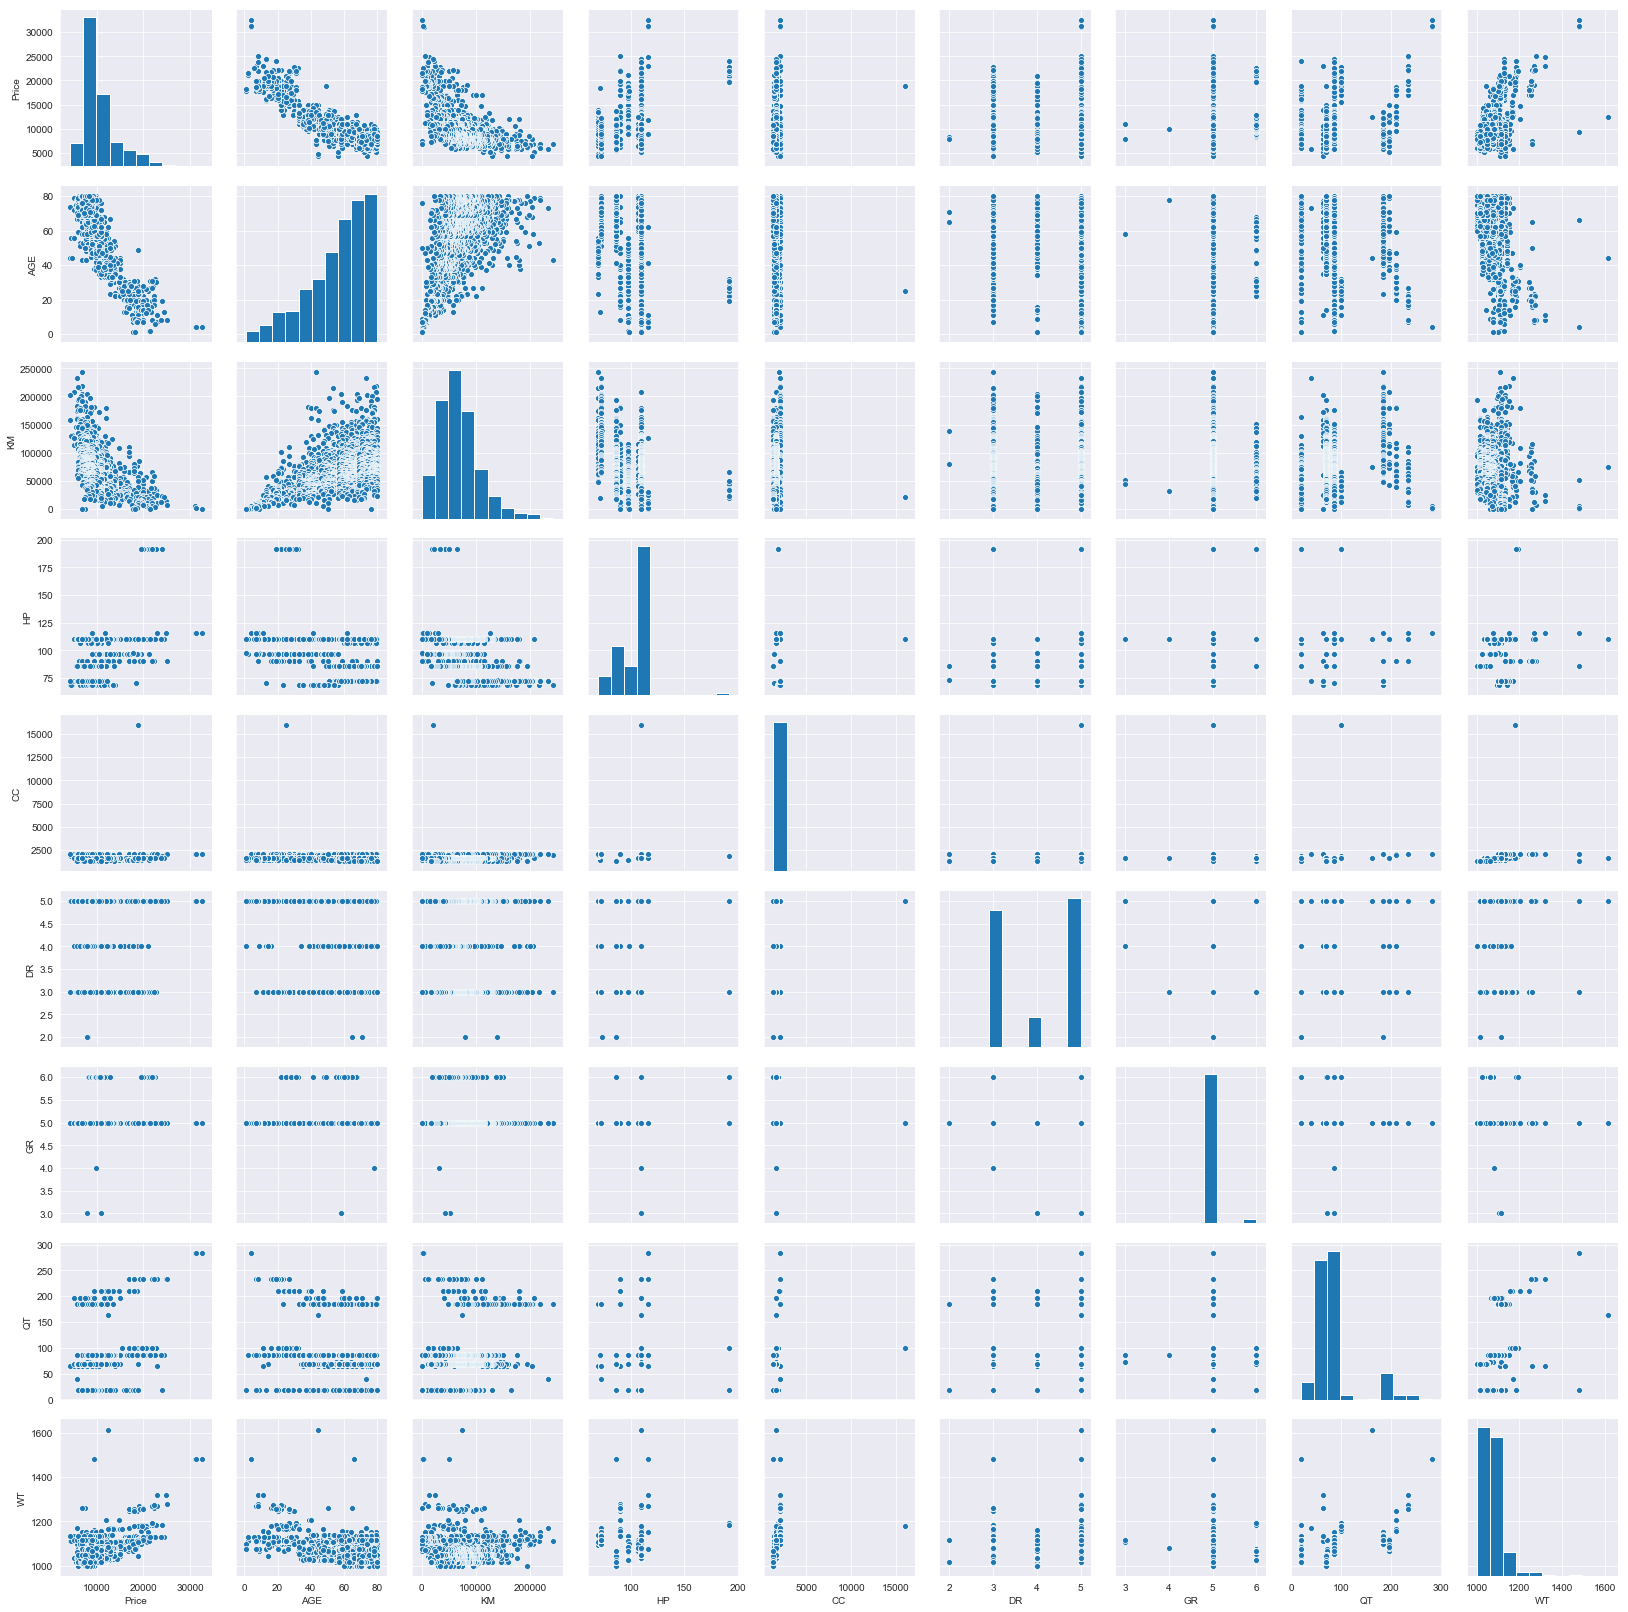

In [94]:
sns.set_style(style='darkgrid')
sns.pairplot(cars2)

In [95]:
import statsmodels.formula.api as smf
model= smf.ols('Price~AGE+KM+HP+CC+DR+GR+QT+WT',data=cars2).fit()

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:28:12   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
AGE         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
DR            -1.6166     40.006     -0.040      0.968     -80.093      76.859
GR           594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
WT            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model= smf.ols('Price~CC',data=cars2).fit()

In [97]:
model= smf.ols('Price~CC',data=cars2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.55e-06
Time:                        11:28:23   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
model= smf.ols('Price~DR',data=cars2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.46e-12
Time:                        11:28:32   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
DR           705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
rsq_CC= smf.ols('CC~AGE+KM+HP+DR+GR+QT+WT',data=cars2).fit().rsquared
vif_CC= 1/(1-rsq_CC)

rsq_AGE= smf.ols('AGE~CC+KM+HP+DR+GR+QT+WT',data=cars2).fit().rsquared
vif_AGE=1/(1-rsq_AGE)

rsq_KM= smf.ols('KM~AGE+CC+HP+DR+GR+QT+WT',data=cars2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP= smf.ols('HP~AGE+KM+CC+DR+GR+QT+WT',data=cars2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_DR= smf.ols('DR~AGE+KM+HP+CC+GR+QT+WT',data=cars2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR= smf.ols('GR~AGE+KM+HP+DR+CC+QT+WT',data=cars2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT= smf.ols('QT~AGE+KM+HP+DR+GR+CC+WT',data=cars2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT= smf.ols('WT~AGE+KM+HP+DR+GR+QT+CC',data=cars2).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1= {'variables':['CC+AGE+KM+HP+DR+GR+QT+WT'],'vif':['vif_CC,vif_AGE,vif_KM,vif_HP,vif_DR,vif_GR,vif_QT,vif_WT']}
vif_frame= pd.DataFrame(d1)
vif_frame

,variables,vif
0,CC+AGE+KM+HP+DR+GR+QT+WT,"vif_CC,vif_AGE,vif_KM,vif_HP,vif_DR,vif_GR,vif..."
